In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.optimizers import SGD, Nadam, Adam

In [ ]:
#Loading data from the CSV file
data = pd.read_csv('/content/balance-scale.data', names=['Classe', 'Left-W', 'Left-D', 'Right-W', 'Right-D'])

In [ ]:
x = data.drop('Classe', axis=1)
y = data['Classe']
#Updating the target vector to numerical values
y.replace({'L': 0, 'B': 1, 'R': 2},inplace=True)
#Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Setting the number of epochs, hidden layers, number of neurons in each layer, and batch size
num_epochs = 50
num_hidden_layers = 2
num_neurons_per_layer = [64, 32]
batch_size = 32

In [ ]:
#Using two different regularizations: Dropout and L2
dropout_regularization = 0.2
regularization_l2 = 0.01

In [ ]:
#Using three different optimizers: Adam, RMSprop, and SGD
optimizers = [SGD(momentum=0.9), Nadam(), Adam()]

#Creating the neural network model
model = Sequential()
model.add(Dense(num_neurons_per_layer[0], input_dim=4, activation='relu', kernel_regularizer=regularizers.l2(regularization_l2)))
model.add(Dropout(dropout_regularization))

for i in range(num_hidden_layers - 1):
    model.add(Dense(num_neurons_per_layer[i + 1], activation='relu', kernel_regularizer=regularizers.l2(regularization_l2)))
    model.add(Dropout(dropout_regularization))

model.add(Dense(1, activation='sigmoid'))

#Compiling the neural network model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
y.replace({'L': 0, 'B': 1, 'R': 2}, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Training the neural network mode
training_history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

#Evaluating the performance of the neural network model
result = model.evaluate(x_test, y_test)
print('Loss:', result[0])
print('Accuracy:', result[1])

result = model.evaluate(x_test, y_test)
print('Loss:', result[0])
print('Accuracy:', result[1])

Epoch 1/50
16/16 [==============================] - 1s 16ms/step - loss: 1.6369 - accuracy: 0.4300 - val_loss: 0.9098 - val_accuracy: 0.2400
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7564 - accuracy: 0.1720 - val_loss: 0.2205 - val_accuracy: 0.1120
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0901 - accuracy: 0.1680 - val_loss: -0.2844 - val_accuracy: 0.1360
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: -0.3699 - accuracy: 0.2080 - val_loss: -0.8904 - val_accuracy: 0.1760
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: -1.0069 - accuracy: 0.2060 - val_loss: -1.6711 - val_accuracy: 0.1920
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: -1.9309 - accuracy: 0.2400 - val_loss: -2.6627 - val_accuracy: 0.2000
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: -3.0611 - accuracy: 0.2420 - val_loss: -3.8875 - val_accuracy: 0.2320
Epoch 8/50

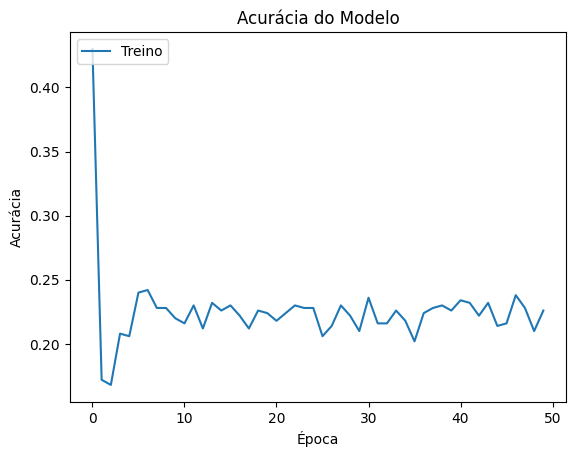

In [ ]:
 #Plotting a graph of the neural network model’s accuracy over epochs.

plt.plot(training_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
